#### 다나와 무선청소기 데이터 시각화


##### 시각화용 모듈 import

In [3]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False 

In [ ]:
# 데이터 가져오기
df_product = pd.read_excel('./3_다나와_핸디스틱청소기_결과.xlsx')
df_product

In [ ]:
# 사용시간 기준 정렬 / 결측치 NaN가 있으면 정렬도 안되지만, 통계도 제대로 안나옴
# 
df_product.sort_values(['사용시간'],ascending=True)

In [ ]:
# 추가 전처리 사용시간, 흡입력이 NaN이면, 0.0으로 치환
df_product.info()

In [ ]:
# 사용시간 중에서 NaN 찾기
df_product['사용시간'].isna()

In [ ]:
# 사용시간 NaN을 0으로 대체 -> 결측치 제거하는 것 중에서 가장 일반적
df_product['사용시간'].fillna(0)

In [ ]:
df_product

In [10]:
# 흡입력 NaN을 0으로 치환
df_product['흡입력'].fillna(0, inplace=True)

In [ ]:
# 사용시간 기준 정렬
df_product.sort_values(['사용시간'], ascending=False)

In [ ]:
# 흡입력 기준 정렬
df_product.sort_values(['흡입력'], ascending=False)

In [ ]:
# 가격 기준 정렬
df_product.sort_values(['가격'], ascending=False)

In [ ]:
# 흡입력 & 사용시간 TOP리스트
top_list = df_product.sort_values(['흡입력', '사용시간'], ascending=False)
top_list

#### 가성비 좋은 제품

In [18]:
# 평균값 정리
price_mean = df_product['가격'].mean()
usetime_mean = df_product['사용시간'].mean()
suction_mean = df_product['흡입력'].mean()
print(f'가격 평균 : {price_mean}원, 사용시간 평균: {usetime_mean}분, 흡입력 평균: {suction_mean}W')

가격 평균 : 418587.6005802708원, 사용시간 평균: 43.94660734149055분, 흡입력 평균: 116.90599613152806W


In [23]:
condition = (df_product['가격'] <= price_mean) & (df_product['사용시간'] >= usetime_mean) & (df_product['흡입력'] >= suction_mean)

df_bestratio = df_product[condition]
df_bestratio

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
17,핸디스틱청소기,샤오미,드리미 V10,153216,60.0,220.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
23,핸디스틱청소기,아이닉,NEW i20 (23년형),169000,50.0,350.0
33,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,412030,60.0,200.0
...,...,...,...,...,...,...
922,핸디스틱청소기,샤오미,디어마 VC20 프로,179990,50.0,170.0
925,핸디스틱청소기,샤오미,G10 라이트,338000,45.0,170.0
940,핸디스틱청소기,SINOLINK,V20 프로,166000,45.0,200.0
942,핸디스틱청소기,샤오미,미지아 1C SCWXCQ02ZHM,252740,60.0,200.0


In [24]:
# axis=0 -> 행,  axis=1 -> 열
df_bestratio.dropna(axis=0)

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
17,핸디스틱청소기,샤오미,드리미 V10,153216,60.0,220.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
23,핸디스틱청소기,아이닉,NEW i20 (23년형),169000,50.0,350.0
33,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,412030,60.0,200.0
...,...,...,...,...,...,...
922,핸디스틱청소기,샤오미,디어마 VC20 프로,179990,50.0,170.0
925,핸디스틱청소기,샤오미,G10 라이트,338000,45.0,170.0
940,핸디스틱청소기,SINOLINK,V20 프로,166000,45.0,200.0
942,핸디스틱청소기,샤오미,미지아 1C SCWXCQ02ZHM,252740,60.0,200.0


In [27]:
# 흡입력, 사용시간 최대값/평균값
usetime_max = df_product['사용시간'].max()
usetime_mean = df_product['사용시간'].mean()
suction_max = df_product['흡입력'].max()
suction_mean = df_product['흡입력'].mean()


##### 데이터 분포 그래프 시각화

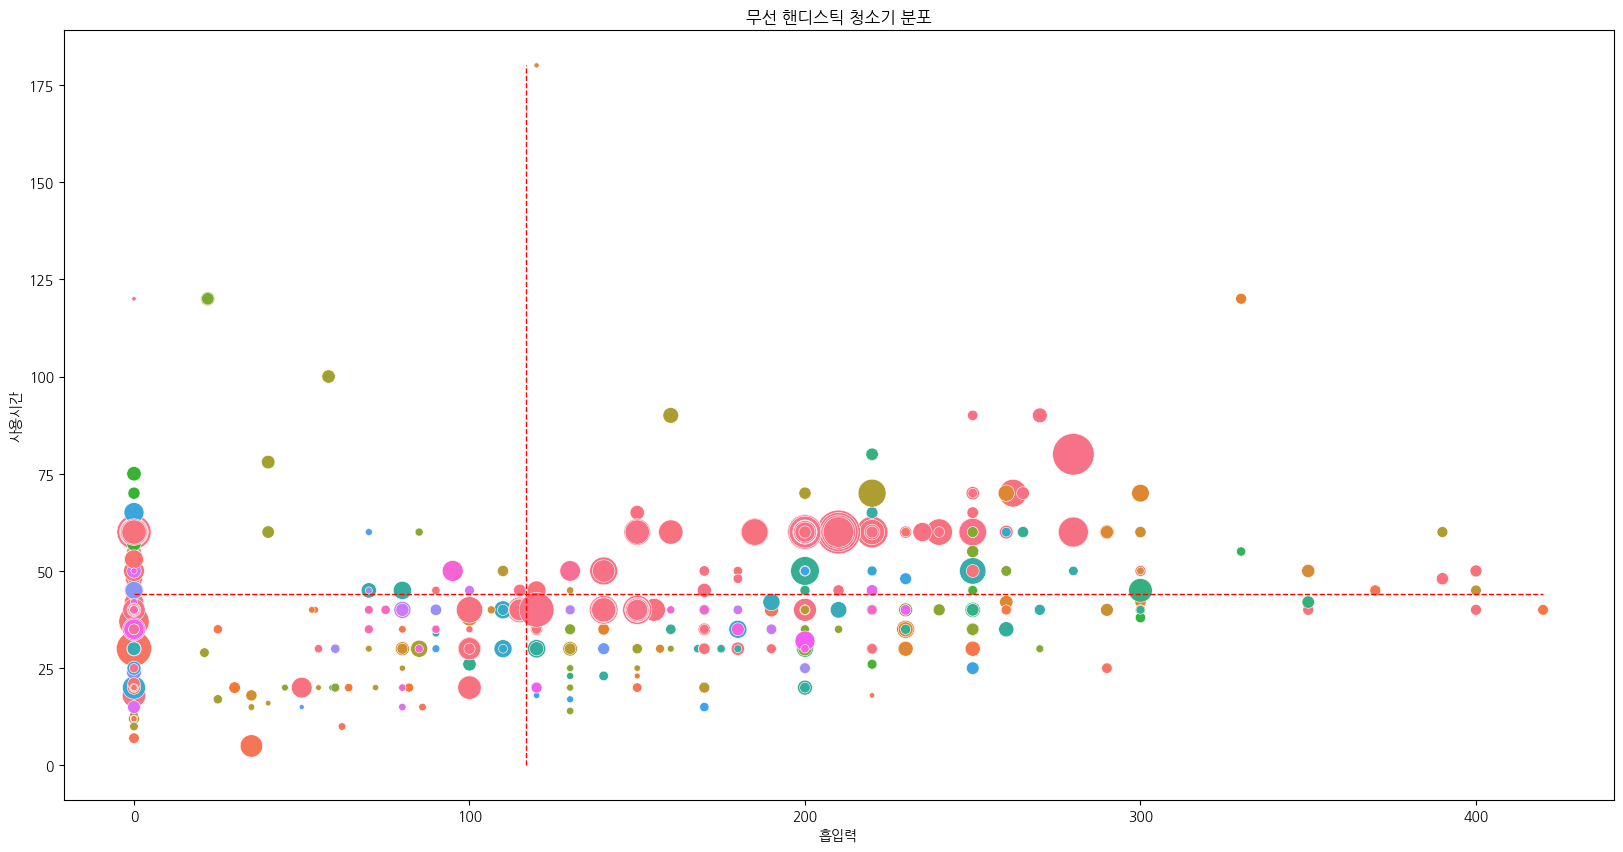

In [36]:
plt.figure(figsize=(20, 10))
plt.title('무선 핸디스틱 청소기 분포')
sns.scatterplot(data=df_product, x='흡입력', y='사용시간', size='가격', hue=df_product['회사명'], legend=False, sizes=(10, 1000))
plt.plot([0, suction_max], [usetime_mean, usetime_mean], 'r--', lw=1)
plt.plot([suction_mean, suction_mean], [0, usetime_max], 'r--', lw=1)
plt.show()